In [ ]:
import pandas as pd

# Open the CSV file with a different encoding
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Print the DataFrame
print(df)

       reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, 

In [ ]:
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).str.replace(' stars', '').str.replace(' star', '').astype(int)

# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)


In [ ]:
import pandas as pd
import re


# Load the dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Define a function to extract the first number from a string
def extract_number(text):
    # Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Return the first number as an integer, or NaN if there are no numbers
    return int(numbers[0]) if numbers else float('nan')

# Apply the function to the 'rating' column
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).apply(extract_number)

# Apply the function to the 'rating_count' column
# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).apply(extract_number)

# To handle 'review_time', we need to check the actual content and clean it accordingly
def convert_review_time_to_days(review_time_str):
    # Lowercase the string to make it case-insensitive
    review_time_str = review_time_str.lower()
    numbers = re.findall(r'\d+', review_time_str)
    if 'month' in review_time_str and numbers:
        return int(numbers[0]) * 30
    elif 'day' in review_time_str and numbers:
        return int(numbers[0])
    elif 'year' in review_time_str and numbers:
        return int(numbers[0]) * 365
    else:
        return float('nan')  # Return NaN for unknown formats

# Apply the conversion function to the 'review_time' column
df['review_time_days'] = df['review_time'].astype(str).apply(convert_review_time_to_days)

# Now, df['review_time_days'] should have the review times converted to days


# Define a function to extract the first number from a string
def extract_number(text):
    # Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Return the first number as an integer, or NaN if there are no numbers
    return int(numbers[0]) if numbers else float('nan')

# Apply the function to the 'rating' column
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).apply(extract_number)

# Apply the function to the 'rating_count' column
# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).apply(extract_number)

# To handle 'review_time', we need to check the actual content and clean it accordingly
def convert_review_time_to_days(review_time_str):
    # Lowercase the string to make it case-insensitive
    review_time_str = review_time_str.lower()
    numbers = re.findall(r'\d+', review_time_str)
    if 'month' in review_time_str and numbers:
        return int(numbers[0]) * 30
    elif 'day' in review_time_str and numbers:
        return int(numbers[0])
    elif 'year' in review_time_str and numbers:
        return int(numbers[0]) * 365
    else:
        return float('nan')  # Return NaN for unknown formats

# Apply the conversion function to the 'review_time' column
df['review_time_days'] = df['review_time'].astype(str).apply(convert_review_time_to_days)

# Function to clean up the review text
def clean_review_text(text):
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Optionally, keep only alphanumeric characters and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9.,!? ]', '', text)

    return text

# Apply the function to the 'review' column
df['review'] = df['review'].astype(str).apply(clean_review_text)

# Verify the operation
print(df['review'].head())

0    Why does it look like someone spit on my food?...
1    Itd McDonalds. It is what it is as far as the ...
2    Made a mobile order got to the speaker and che...
3    My mc. Crispy chicken sandwich was  customer s...
4    I repeat my order 3 times in the drive thru, a...
Name: review, dtype: object


In [ ]:
# Print the shape of the DataFrame to see how many rows and columns it has
print(df.shape)

(33396, 11)


In [ ]:
# Print the data types of each column to understand what types of data are stored
print(df.dtypes)

reviewer_id           int64
store_name           object
category             object
store_address        object
latitude            float64
longitude           float64
rating_count          int64
review_time          object
review               object
rating                int64
review_time_days    float64
dtype: object


In [ ]:
# Print descriptive statistics for numerical columns to get a sense of the data distribution
print(df.describe())

        reviewer_id     latitude      longitude  rating_count        rating  \
count  33396.000000  32736.000000  32736.000000  33396.000000  33396.000000   
mean   16698.500000     34.442546    -90.647033    107.908282      3.131363   
std     9640.739131      5.344116     16.594844    287.387303      1.615139   
min        1.000000     25.790295   -121.995421      1.000000      1.000000   
25%     8349.750000     28.655350    -97.792874      1.000000      1.000000   
50%    16698.500000     33.931261    -81.471414      2.000000      3.000000   
75%    25047.250000     40.727401    -75.399919      4.000000      5.000000   
max    33396.000000     44.981410    -73.459820    999.000000      5.000000   

       review_time_days  
count      27639.000000  
mean        1186.935345  
std          640.538561  
min            2.000000  
25%          730.000000  
50%         1095.000000  
75%         1460.000000  
max         4380.000000  


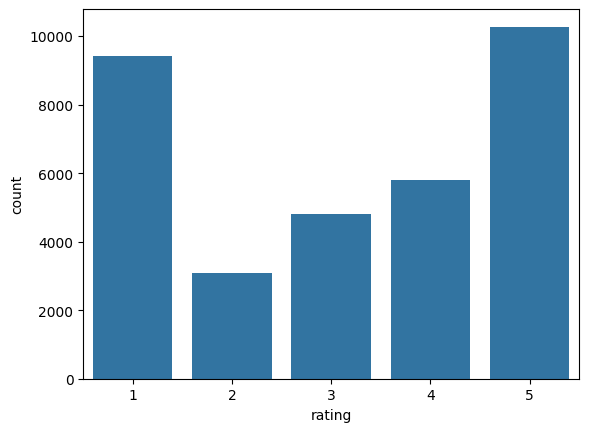

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of ratings
sns.countplot(data=df, x='rating')
plt.show()

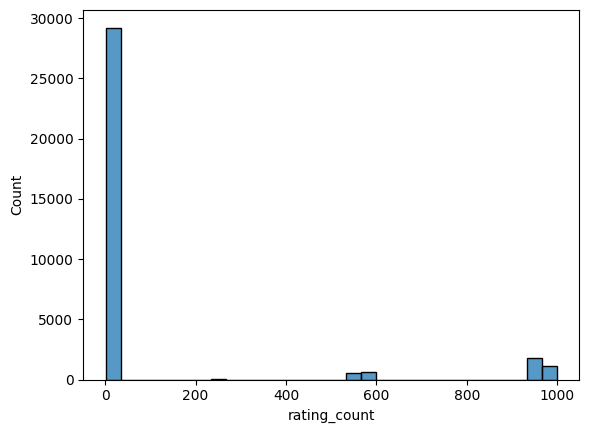

In [ ]:
# Rating counts distribution
sns.histplot(data=df, x='rating_count', bins=30)
plt.show()

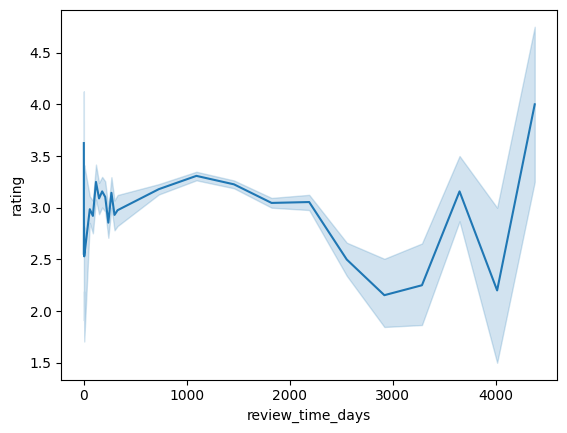

In [ ]:
# Trend of ratings over time
sns.lineplot(data=df, x='review_time_days', y='rating')
plt.show()

<ipython-input-10-04e2334a54a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


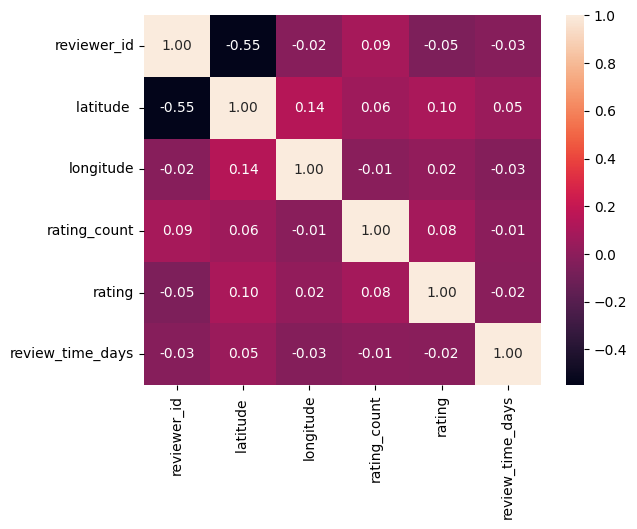

In [ ]:
# Correlation matrix to see if there's any relationship between numeric fields
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

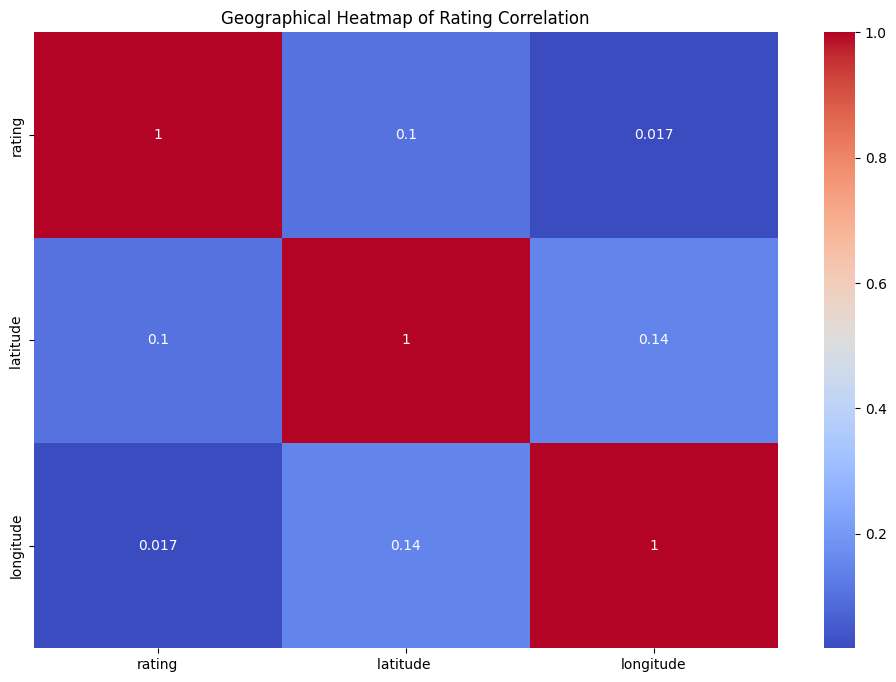

In [ ]:
# prompt: generate a geographical graph heat map showing correlation between rating and geographical location

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with only the relevant columns
df_map = df[['rating', 'latitude ', 'longitude']]

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df_map.corr(), annot=True, cmap='coolwarm')
plt.title('Geographical Heatmap of Rating Correlation')
plt.show()


In [ ]:
import folium
from folium import plugins
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Clean the 'rating' column by removing 'stars' or 'star' and converting to integer
df['rating'] = df['rating'].str.replace(' stars', '').str.replace(' star', '').astype(int)

# Now can proceed with the heatmap creation as described previously
# Assuming DataFrame has 'latitude', 'longitude', and 'rating' columns
# Adjust 'latitude', 'longitude', and 'rating' to match actual column names
latitude_column = 'latitude '  # Adjust this to actual latitude column name
longitude_column = 'longitude'  # Adjust this to actual longitude column name
rating_column = 'rating'  # Adjust this to actual rating column name

# Filter out rows where any of the required information is missing
df_filtered = df.dropna(subset=[latitude_column, longitude_column, rating_column])

# Create a base map
map = folium.Map(location=[df_filtered[latitude_column].mean(), df_filtered[longitude_column].mean()], zoom_start=5)

# Create a heatmap layer
heatmap_data = [
    (row[latitude_column], row[longitude_column], row[rating_column])  # Using rating as weight
    for index, row in df_filtered.iterrows()
]
heatmap = plugins.HeatMap(heatmap_data, radius=15)  # can adjust radius and other parameters as needed

# Add the heatmap to the map
map.add_child(heatmap)

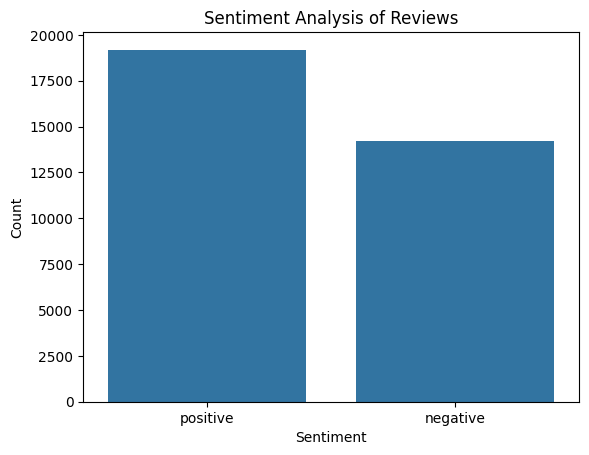

In [ ]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Function to classify sentiment
def sentiment_analysis(text):
    # Using TextBlob to find the polarity of the text
    polarity = TextBlob(text).sentiment.polarity
    # Return 'positive' if polarity > 0, 'negative' otherwise
    return 'positive' if polarity > 0 else 'negative'

# Apply the sentiment analysis function to the 'review' column
df['sentiment'] = df['review'].astype(str).apply(sentiment_analysis)

# Now, let's plot the sentiment distribution
sns.countplot(x=df['sentiment'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


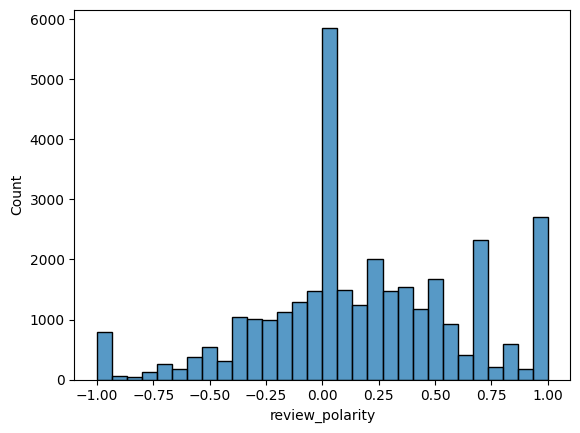

In [ ]:
from textblob import TextBlob

# Sentiment analysis of reviews
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['review_polarity'] = df['review'].apply(get_polarity)

# Plot distribution of review sentiment polarity
sns.histplot(data=df, x='review_polarity', bins=30)
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame and 'review' is the column with the review text

# A simple example of aspect terms for a restaurant domain
aspects = ['food', 'service', 'ambiance', 'price']

# Function to find sentiment for one aspect
def find_aspect_sentiment(text, aspect):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Dictionary to hold sentiment for each aspect
aspect_sentiments = {aspect: [] for aspect in aspects}

# Analyze sentiment for each aspect
for aspect in aspects:
    for review in df['review'].astype(str):
        if aspect in review.lower():  # Check if the aspect is mentioned in the review
            polarity, _ = find_aspect_sentiment(review, aspect)
            aspect_sentiments[aspect].append(classify_sentiment(polarity))
        else:
            aspect_sentiments[aspect].append('not mentioned')

# Convert aspect sentiments to a DataFrame for easy manipulation
aspect_df = pd.DataFrame(aspect_sentiments)

# Now, aspect_df contains the sentiment for each aspect for each review


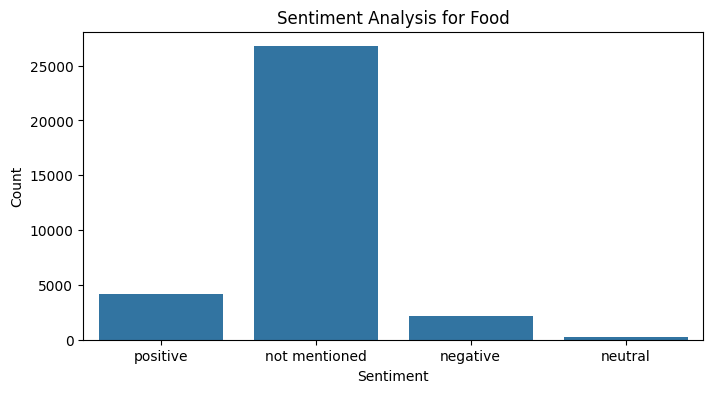

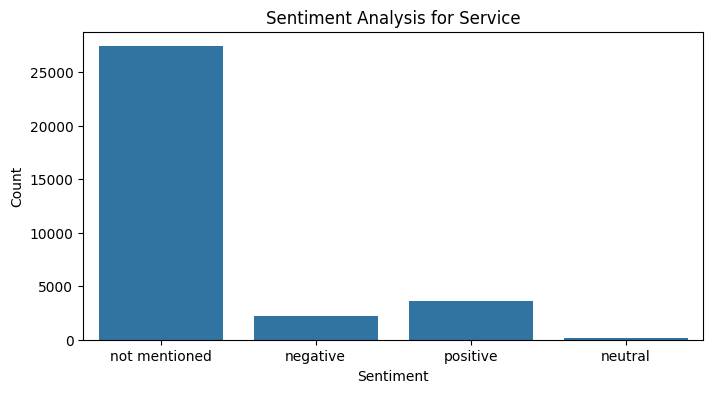

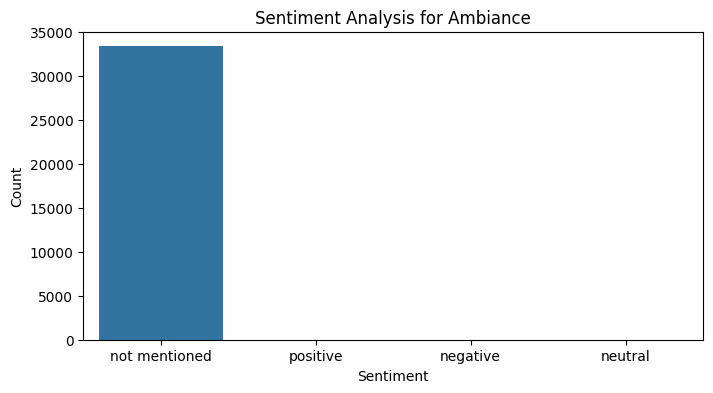

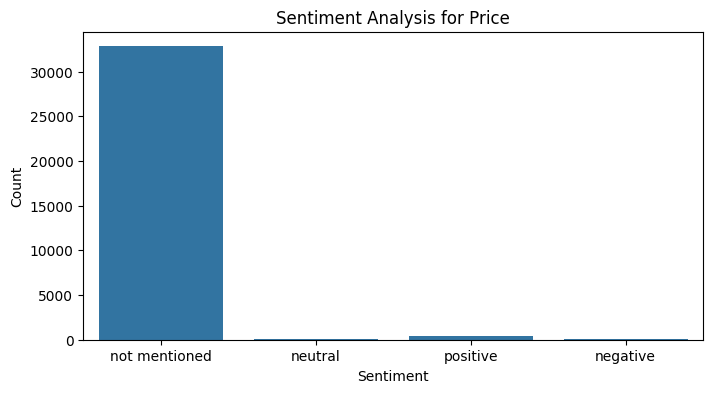

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment distribution for each aspect
for aspect in aspects:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=aspect, data=aspect_df)
    plt.title(f'Sentiment Analysis for {aspect.capitalize()}')
    plt.ylabel('Count')
    plt.xlabel('Sentiment')
    plt.show()


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment-driving words
def sentiment_driving_words(text):
    # Tokenize and tag the text
    tagged_text = pos_tag(word_tokenize(text))

    # We'll store the results in a dictionary
    sentiment_words = defaultdict(list)

    # For each word and tag
    for word, tag in tagged_text:
        # We're interested in adjectives ("JJ"), but you could expand this list
        if tag.startswith('JJ'):
            # Get the sentiment score
            sentiment = sid.polarity_scores(word)
            # Classify the type of sentiment
            if sentiment['compound'] > 0.1:
                sentiment_words['positive'].append(word)
            elif sentiment['compound'] < -0.1:
                sentiment_words['negative'].append(word)
            else:
                sentiment_words['neutral'].append(word)
    return sentiment_words

# Example usage with our DataFrame 'df' with the 'review' column
df['sentiment_words'] = df['review'].apply(sentiment_driving_words)

# Now, df['sentiment_words'] contains the sentiment-driving words for each review


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


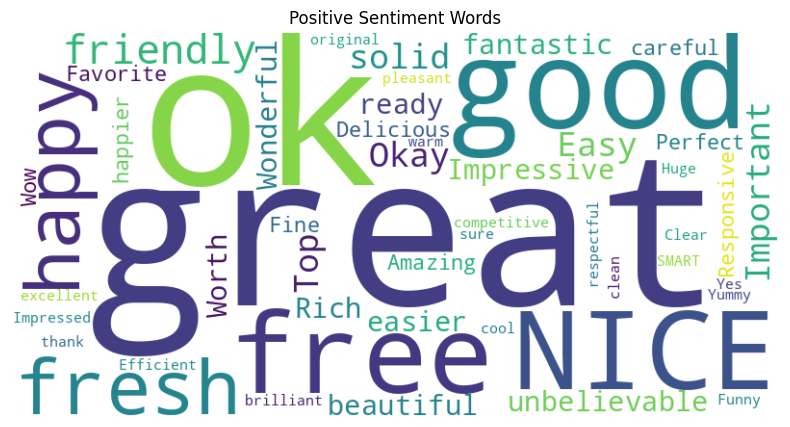

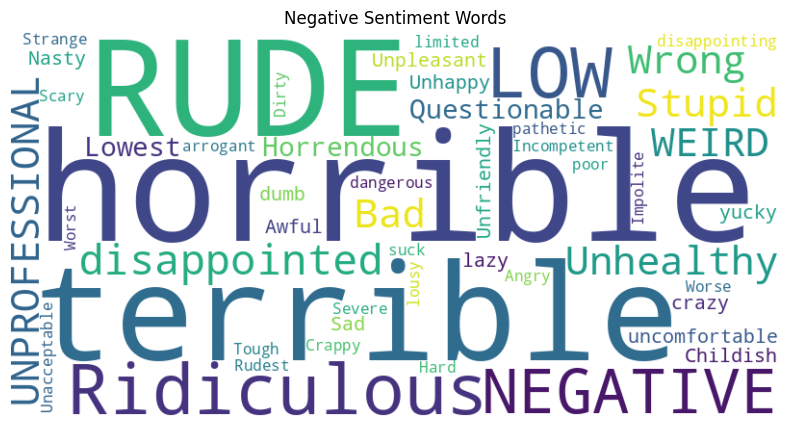

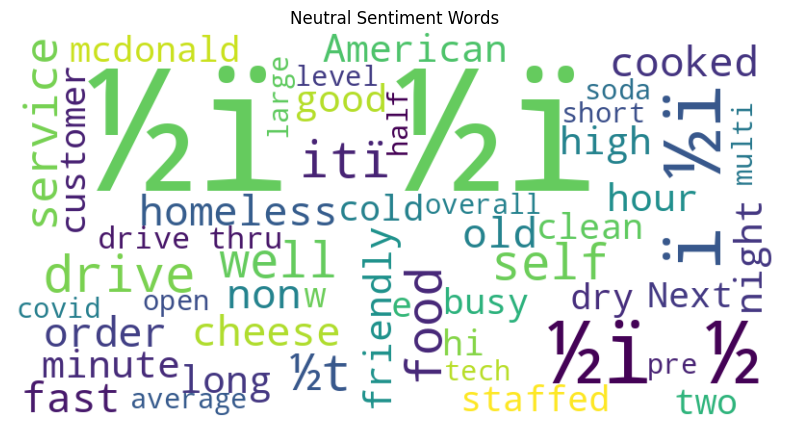

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to accumulate words without duplicates
def accumulate_unique_words(words_list):
    unique_words = set()
    for words in words_list:
        unique_words.update(words.split())
    return ' '.join(unique_words)

# Accumulate words for each sentiment category
positive_words = accumulate_unique_words(df['sentiment_words'].apply(lambda x: ' '.join(x['positive'])))
negative_words = accumulate_unique_words(df['sentiment_words'].apply(lambda x: ' '.join(x['negative'])))
neutral_words = accumulate_unique_words(df['sentiment_words'].apply(lambda x: ' '.join(x['neutral'])))

# Create and display word clouds for each sentiment
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(negative_words)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(neutral_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Words')
plt.show()


In [ ]:
# Install required libraries (execute in your command line or notebook environment)
!pip install emoji==0.6.0
!pip install text2emotion

# Import necessary libraries
import text2emotion as te
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Define a function to safely apply text2emotion.get_emotion (handles exceptions)
def get_emotions(text):
    try:
        return te.get_emotion(text)
    except Exception as e:  # Catching any exception to prevent crashes
        print(f"Skipping text due to error: {e}")
        return {}

# Apply the function to each review in the DataFrame
df['emotions'] = df['review'].apply(get_emotions)

# Aggregate emotion counts for visualization
emotion_counts = defaultdict(int)
for emotions in df['emotions']:
    for emotion, value in emotions.items():
        emotion_counts[emotion] += value

# Prepare data for plotting
emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Create a bar plot of the emotions
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Reviews')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load  dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


KeyError: 'sentiment_label'

In [ ]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import text2emotion as te

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Define your function to get emotions with exception handling
def get_emotions(text):
    try:
        return te.get_emotion(text)
    except AttributeError as e:
        print(f"Skipping text due to error: {e}")
        return {}

# Function to apply emotion analysis in parallel
def apply_emotions_parallel(df, function, column_name='review'):
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(function, text): text for text in df[column_name]}
        for future in as_completed(futures):
            yield future.result()

# Apply the function in parallel and store the results in a new column
df['emotions'] = list(apply_emotions_parallel(df, get_emotions))

# Continue with emotion aggregation and plotting as before


KeyboardInterrupt: 